In [39]:
import pandas as pd
import numpy as np
import scipy as sc


import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sbs
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_excel('Fundamental Data.xlsx')

# удаляем нулевые стобцы
null_columns = np.array(df.count()[df.count()<9000].index)
df.drop(columns=null_columns, inplace=True)

df.rename(columns={'act': 'cur_assets', 'ap': 'acc_payable', 'at': 'total_assets', 'bkvlps': 'book_value_per_share',
                   'capx': 'capex', 'ceq': 'equity', 'ceqt': 'tangible_equity', 'ch': 'cash', 'dlc': 'STD',
                   'dltt': 'LTD', 'dp': 'amort', 'dvt': 'dividends', 'emp': 'employees', 'icapt': 'Invested_capital', 
                   'intan': 'intangible_assets', 'intpn': 'interests_paid_net', 'invt': 'inventories', 'lo': 'other_liabilities',
                   'lt': 'liabilities_total', 'mib': 'minority_interests', 'mibt': 'noncontrolling_interests', 'msa': 'marketable_sec',
                   'ni': 'net_income', 'oancf': 'op_act_net_CF', 'oiadp': 'op_inc_after_dep', 'oibdp': 'op_in_before_dep', 
                   'pstk': 'preference_stock', 're': 'Retained Earnings', 'rect': 'acc_receivables', 'sale': 'sales', 
                   'seq': 'stockholders_equity', 'txditc': 'deferred_taxes', 'txfed': 'deferred_taxes_fed', 'txfo': 'deferred_taxes_foreign',
                   'txt': 'income_taxes', 'wcap': 'working_cap', 'xint': 'int_exp', 'xintopt': 'Implied Option Expense'}, inplace=True)

df['COGS'] = df['sales'] * (1 - df['GrossMargin']/100)
df['Other_exp'] = df['sales'] - df['COGS'] - df['ebit']
df['tax'] = df['ebit'] - df['interests_paid_net'] - df['net_income']

naming = pd.read_excel('my_excel_file.xlsx')

list = []
for element in df['GVKey']:
    if element in np.array(naming['GVKey']):
        list.append(1)
    else:
        list.append(0)

df['indexing'] = list
df = df[df.indexing == 1]

df['company'] = 'new_name'
df['label'] = 'new_label'
for element in np.array(naming['GVKey']):
    df['company'][df['GVKey'] == element] = np.array(naming['Company'][naming['GVKey'] == element])[0]
    df['label'][df['GVKey'] == element] = np.array(naming['Label'][naming['GVKey'] == element])[0]
    
df = df[df['Iid'] == 1]
df = df[['DataDate','company', 'Sector', 'cur_assets', 'acc_payable', 'total_assets', 'book_value_per_share',
       'capex', 'equity', 'tangible_equity', 'cash', 'STD', 'LTD', 'amort', 'dividends', 'ebit', 'employees', 'Invested_capital',
       'intangible_assets', 'interests_paid_net', 'inventories', 'other_liabilities', 'liabilities_total', 'minority_interests',
       'noncontrolling_interests', 'mii', 'marketable_sec', 'net_income', 'op_act_net_CF', 'op_inc_after_dep', 'op_in_before_dep',
       'preference_stock', 'Retained Earnings', 'acc_receivables', 'sales', 'stockholders_equity', 'deferred_taxes', 'deferred_taxes_fed',
       'deferred_taxes_foreign', 'income_taxes', 'working_cap', 'int_exp', 'Implied Option Expense', 'EarningsYld', 'EpsGrowth1Yr', 'GrossMargin',
       'OperatingMargin', 'PriceBook', 'ROA', 'ROE', 'SalesGrowth1Yr','SalesGrowth5Yr', 'SalesYld', 'COGS', 'Other_exp', 'tax',
       'label']]  
# df.to_excel('New_Fundamental_Data.xlsx')

In [3]:
df = pd.read_excel('New_Fundamental_Data.xlsx')

In [47]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
mis_table = missing_values_table(df)

Your selected dataframe has 58 columns.
There are 45 columns that have missing values.


In [48]:
mis_table[mis_table['Missing Values']<500].index
mis_table.loc['other missing values', 'Missing Values'] = mis_table[mis_table['Missing Values']<500]['Missing Values'].sum()
mis_table.loc['other missing values', '% of Total Values'] = mis_table[mis_table['Missing Values']<500]['% of Total Values'].mean()
mis_table = mis_table.drop(mis_table[mis_table['Missing Values']<500].index)
mis_table.reset_index(inplace =True)

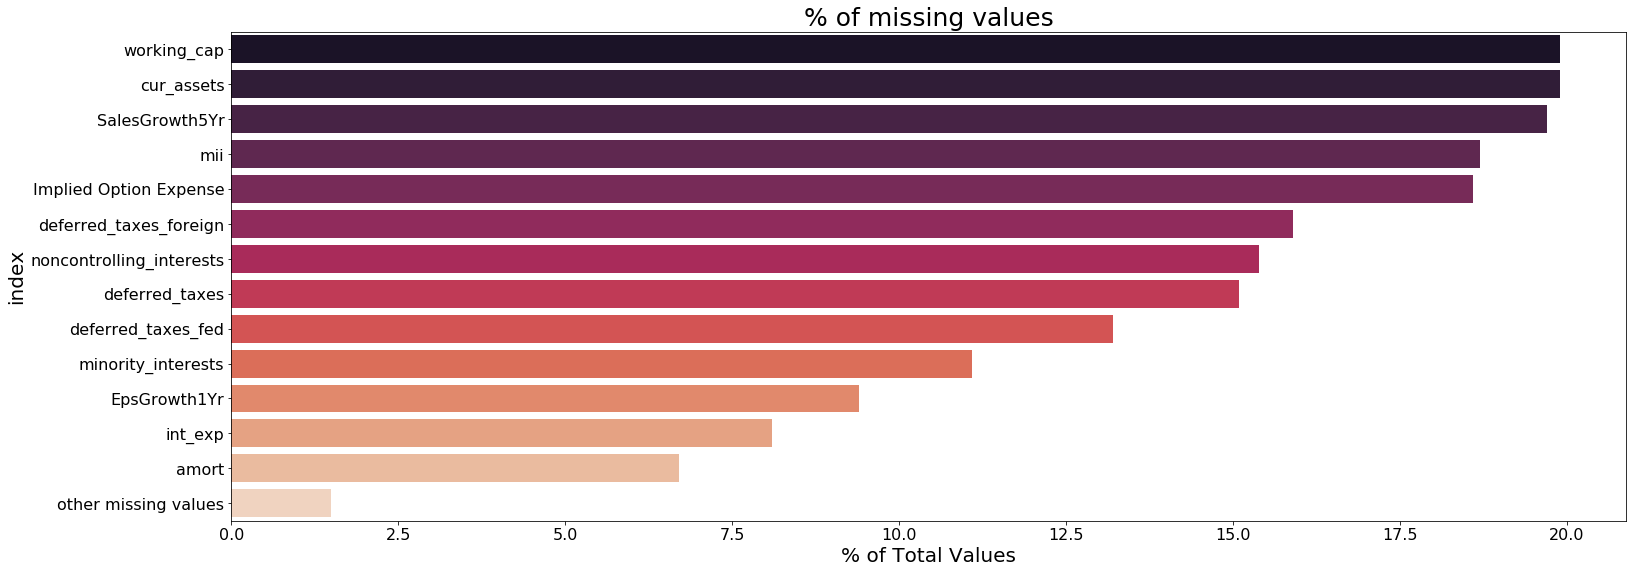

In [49]:

plt.figure( figsize=(25, 9))
plt.title("% of missing values", fontsize = 25)
plt.xlabel('x', fontsize = 20)
plt.ylabel('y', fontsize = 20)
sbs.barplot(x = '% of Total Values', y = 'index', palette="rocket", data = mis_table)
plt.xticks()

plt.tick_params(axis='both', which='major', labelsize=16)

In [57]:
describe_F_data = df.drop(columns = 'Unnamed: 0').describe().T
describe_F_data.to_excel('New_Fundamental_stat.xlsx')

In [ ]:
df